# Исследование авиарейсов.
____

### В данном исследовании анализируются авиарейсы внутри России.
____

### Исследование разделено на несколько частей.

#### [Часть 1. Подготовка к исследованию и изучение общей информации:](#1)

* [1. Импорт библиотек.](#1.1)
* [2. Получение и изучение общей информации о данных.](#1.2)

#### [Часть 2. Исследовательский анализ данных:](#2)

* [1. Топ 10 городов по количеству авиарейсов.](#2.1)
* [2. Зависимость количества авиарейсов от модели самолета.](#2.2)
* [3. Зависимость количества авиарейсов от города.](#2.3)

#### [Часть 3. Общий вывод](#3)

## Часть 1. Подготовка к исследованию и изучение общей информации <a id='1'></a>

### 1.1 Импорт библиотек <a id='1.1'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

### 1.2 Получение необходимых данных. <a id='1.2'></a>

In [6]:
req = requests.get('https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html')
soup = BeautifulSoup(req.text, 'lxml')

table = soup.find('table',attrs={"id": "best_festivals"})
heading_table = [] # Список, в котором будут храниться названия столбцов
for row in table.find_all('th'):
        heading_table.append(row.text)

content=[] # Список, в котором будут храниться данные из таблицы
for row in table.find_all('tr'): 
    if not row.find_all('th'): 
            content.append([element.text for element in row.find_all('td')])

festivals = pd.DataFrame(content, columns=heading_table) 
display(festivals)

,Название фестиваля,Место проведения,Дата проведения
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,01.07.2018
1,Фестиваль музыки и технологий Alfa Future People,Нижний Новгород,10.08.2018
2,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,21.07.2018
3,Доброфест,Ярославль,29.07.2018
4,Park Live,Москва,28.07.2018
5,Пикник Афиши,Москва,04.08.2018
6,VK FEST,Санкт-Петербург,29.07.2018
7,"Фестиваль «О, да! Еда!»",Иркутск,25.08.2018
8,"Фестиваль «О, да! Еда!»",Владивосток,02.09.2018
9,Видфест,Москва,08.09.2018


### 1.2 Изучение общей информации о данных <a id='1.2'></a>

In [2]:
models = pd.read_csv('/datasets/query_1.csv')
models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
display(models)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


В этой таблице с данными все в порядке.

In [4]:
cities = pd.read_csv('/datasets/query_3.csv')
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [5]:
cities.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [6]:
print(cities['city'].sort_values().unique())

['Абакан' 'Анадырь' 'Анапа' 'Архангельск' 'Астрахань' 'Барнаул' 'Белгород'
 'Белоярский' 'Благовещенск' 'Братск' 'Брянск' 'Бугульма' 'Владивосток'
 'Владикавказ' 'Волгоград' 'Воркута' 'Воронеж' 'Геленджик' 'Горно-Алтайск'
 'Грозный' 'Екатеринбург' 'Иваново' 'Ижевск' 'Иркутск' 'Йошкар-Ола'
 'Казань' 'Калининград' 'Калуга' 'Кемерово' 'Киров' 'Когалым'
 'Комсомольск-на-Амуре' 'Краснодар' 'Красноярск' 'Курган' 'Курск' 'Кызыл'
 'Липецк' 'Магадан' 'Магнитогорск' 'Махачкала' 'Минеральные Воды' 'Мирный'
 'Москва' 'Мурманск' 'Надым' 'Нальчик' 'Нарьян-Мар' 'Нерюнгри'
 'Нефтеюганск' 'Нижневартовск' 'Нижнекамск' 'Нижний Новгород'
 'Новокузнецк' 'Новосибирск' 'Новый Уренгой' 'Норильск' 'Ноябрьск'
 'Нягань' 'Омск' 'Оренбург' 'Орск' 'Пенза' 'Пермь' 'Петрозаводск'
 'Петропавловск-Камчатский' 'Псков' 'Ростов-на-Дону' 'Салехард' 'Самара'
 'Санкт-Петербург' 'Саранск' 'Саратов' 'Советский' 'Сочи' 'Ставрополь'
 'Стрежевой' 'Сургут' 'Сыктывкар' 'Тамбов' 'Томск' 'Тюмень' 'Удачный'
 'Улан-Удэ' 'Ульяновск' 'Ур

В этой таблице с данными тоже все в порядке.

## Часть 2. Исследовательский анализ данных. <a id='2'></a>

### 2.1 Топ 10 городов по количеству авиарейсов. <a id='2.1'></a>

In [7]:
cities = cities.sort_values(by='average_flights', ascending=False)
top_cities = cities.head(10)
display(top_cities)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


### 2.2 Зависимость количества авиарейсов от модели самолета. <a id='2.2'></a>

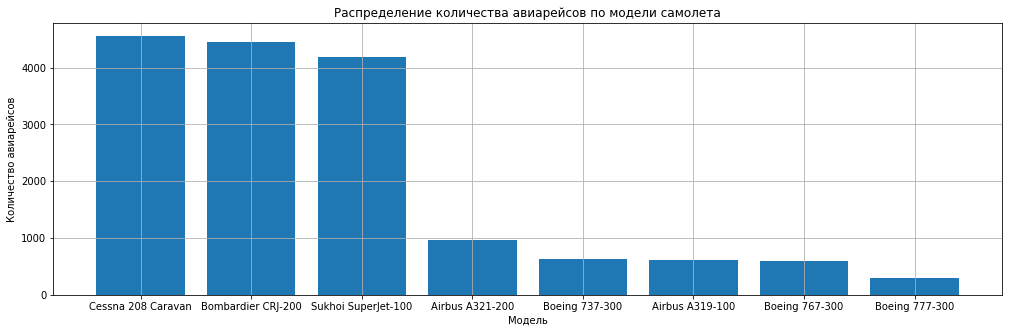

In [8]:
models = models.sort_values(by='flights_amount', ascending=False)

plt.rcParams['figure.figsize']=(17, 5)
plt.bar(height=models['flights_amount'], x=models['model'])
plt.xlabel('Модель')
plt.ylabel('Количество авиарейсов')
plt.title('Распределение количества авиарейсов по модели самолета')
plt.grid(True)
plt.show()

### Вывод 
1. Во внутренних авиаперевозках  доминируют самолеты с максимальным количеством пассажирских мест меньше 100.
2. Среди моделей самолетов нет сильной конкуренции. Каждая из 3 доминирующих моделей разработана для различных задач.

### 2.3 Зависимость количества авиарейсов от города. <a id='2.3'></a>

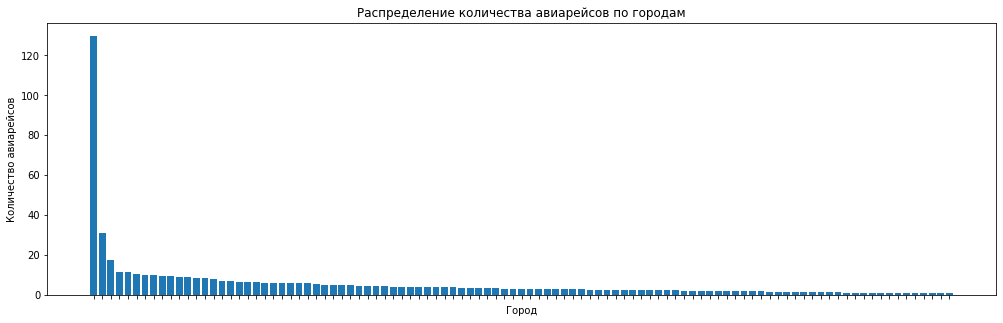

In [9]:
names = []
for i in range(101):
    names.append('')

plt.bar(height=cities['average_flights'], x=cities['city'], tick_label = names)
plt.xlabel('Город')
plt.ylabel('Количество авиарейсов')
plt.title('Распределение количества авиарейсов по городам')
plt.show()

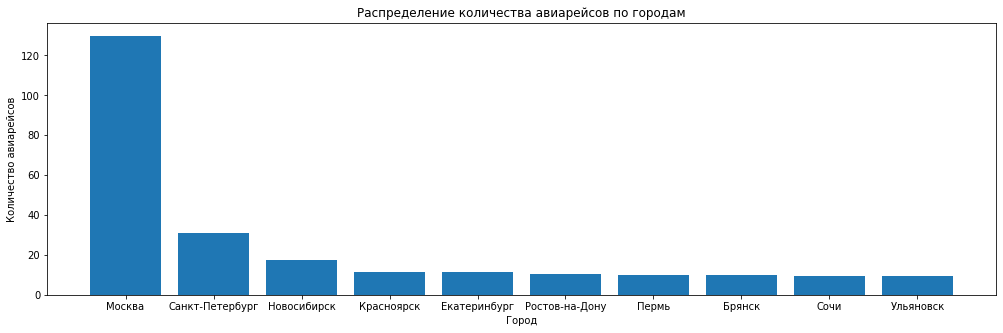

In [10]:
plt.bar(height=top_cities['average_flights'], x=top_cities['city'])
plt.xlabel('Город')
plt.ylabel('Количество авиарейсов')
plt.title('Распределение количества авиарейсов по городам')
plt.show()

### Вывод:
Количество авиарейсов в Москве значительно больше, чем в остальных городах. Также выделяются Санкт-Петербург и Новосибирск.

## Часть 3. Вывод. <a id='3'></a>

В ходе исследования я:
1. Проверил на корректность полученную ранее информацию.
2. Выбрал топ-10 городов по количеству рейсов.
3. Изучил зависимость количества рейсов от города и модели самолета.

В результате исследования я пришел к следующим выводам:
1. Во внутренних авиаперевозках доминируют самолеты с максимальным количеством пассажирских мест меньше 100.
2. Среди моделей самолетов нет сильной конкуренции. Каждая из 3 доминирующих моделей разработана для различных задач.
3. Количество авиарейсов в Москве значительно больше, чем в остальных городах. Также выделяются Санкт-Петербург и Новосибирск.